In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("/content/mission6.csv")

In [43]:
data.head()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,Yes,Yes,No
1,69,38.4,123,12,No,No,No
2,46,34.1,111,2,Yes,No,Yes
3,32,25.5,149,3,Yes,Yes,Yes
4,60,30.8,111,2,Yes,No,Yes


In [44]:
data.duplicated().sum()

np.int64(900)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1000 non-null   int64  
 1   BMI                             1000 non-null   float64
 2   Blood Pressure                  1000 non-null   int64  
 3   Physical Activity (hours/week)  1000 non-null   int64  
 4   Family History                  1000 non-null   object 
 5   Smoking Status                  1000 non-null   object 
 6   Diabetes Risk                   1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [47]:
data.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)',
       'Family History', 'Smoking Status', 'Diabetes Risk'],
      dtype='object')

In [48]:
data['Family History'] = data['Family History'].map({"Yes":1, "No": 0})
data['Smoking Status'] = data['Smoking Status'].map({"Yes":1, "No": 0})
data['Diabetes Risk'] = data['Diabetes Risk'].map({"Yes":1, "No": 0})

In [49]:
data.head()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,132,11,1,1,0
1,69,38.4,123,12,0,0,0
2,46,34.1,111,2,1,0,1
3,32,25.5,149,3,1,1,1
4,60,30.8,111,2,1,0,1


In [50]:
encode_cols = ['Smoking Status', 'Blood Pressure']

In [51]:
le = {}
for col in encode_cols:
  le[col] = LabelEncoder()
  data[col] = le[col].fit_transform(data[col])

In [52]:
le

{'Smoking Status': LabelEncoder(), 'Blood Pressure': LabelEncoder()}

In [53]:
data.head()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,38,11,1,1,0
1,69,38.4,33,12,0,0,0
2,46,34.1,23,2,1,0,1
3,32,25.5,51,3,1,1,1
4,60,30.8,23,2,1,0,1


In [54]:
from sklearn.preprocessing import StandardScaler
scale_cols = ['Physical Activity (hours/week)']
scaler = StandardScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [55]:
data.head()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
0,56,27.0,38,0.819329,1,1,0
1,69,38.4,33,1.043006,0,0,0
2,46,34.1,23,-1.193765,1,0,1
3,32,25.5,51,-0.970088,1,1,1
4,60,30.8,23,-1.193765,1,0,1


In [56]:
data.describe()

,Age,BMI,Blood Pressure,Physical Activity (hours/week),Family History,Smoking Status,Diabetes Risk
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,50.398000,28.983400,27.849000,3.552714e-17,0.560000,0.502000,0.50000
std,19.171676,6.073888,16.671777,1.000500e+00,0.496635,0.500246,0.50025
min,19.000000,18.500000,0.000000,-1.641119e+00,0.000000,0.000000,0.00000
25%,34.000000,24.000000,13.000000,-9.700876e-01,0.000000,0.000000,0.00000
50%,50.000000,28.300000,25.500000,1.482979e-01,1.000000,1.000000,0.50000
75%,69.000000,33.800000,43.000000,1.043006e+00,1.000000,1.000000,1.00000
max,79.000000,40.000000,57.000000,1.490360e+00,1.000000,1.000000,1.00000


Text(0, 0.5, 'Frequecy')

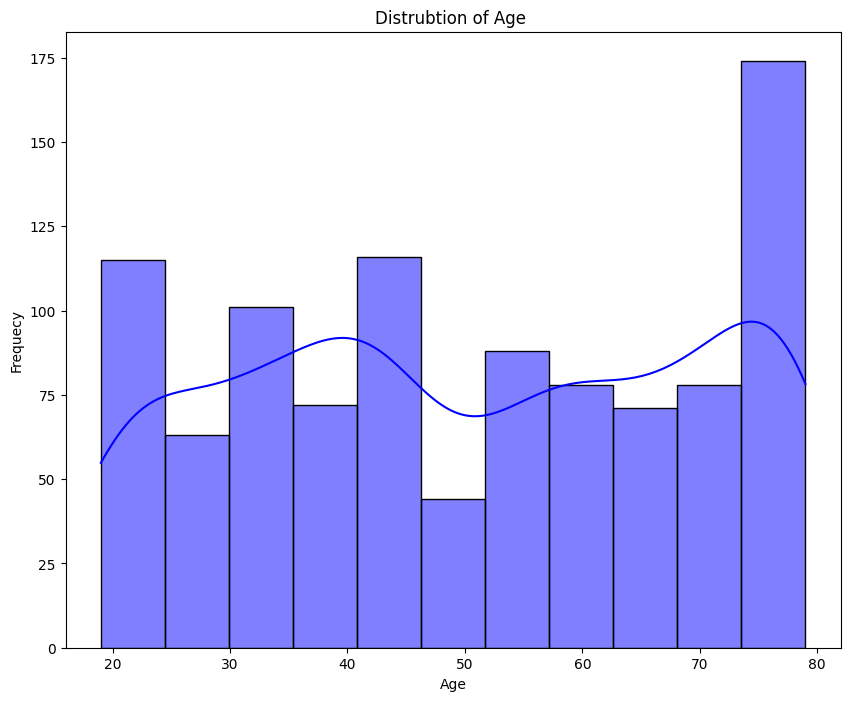

In [57]:
plt.figure(figsize=(10,8))
sns.histplot(data['Age'], color="Blue", kde=True)
plt.title("Distrubtion of Age ")
plt.xlabel("Age")
plt.ylabel("Frequecy")


Text(0.5, 1.0, 'Age and BMI')

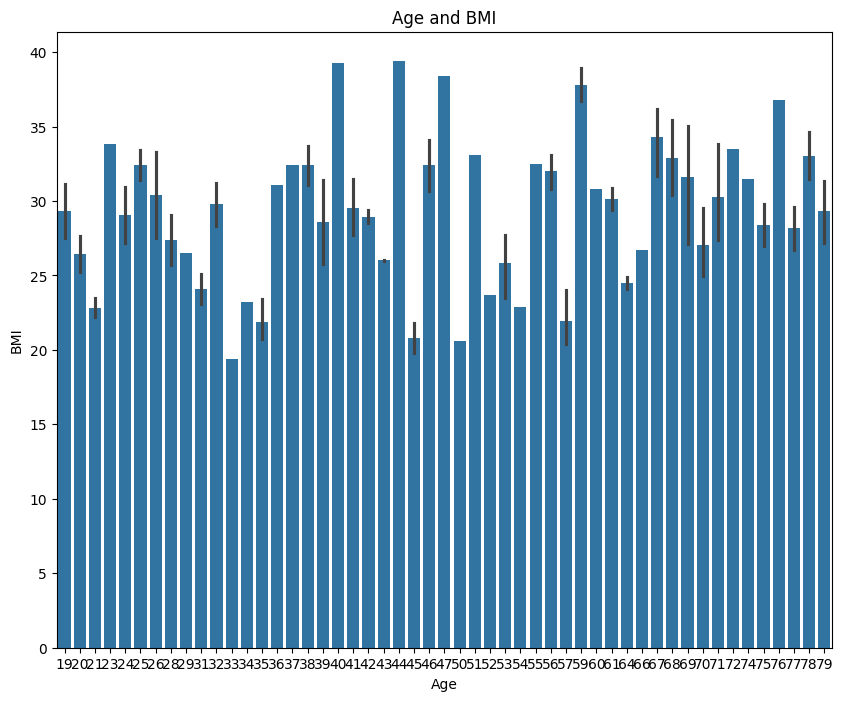

In [58]:
plt.figure(figsize=(10, 8))
sns.barplot(x=data['Age'], y=data['BMI'])
plt.title("Age and BMI")

Text(0.5, 1.0, 'Realtion between family history and target')

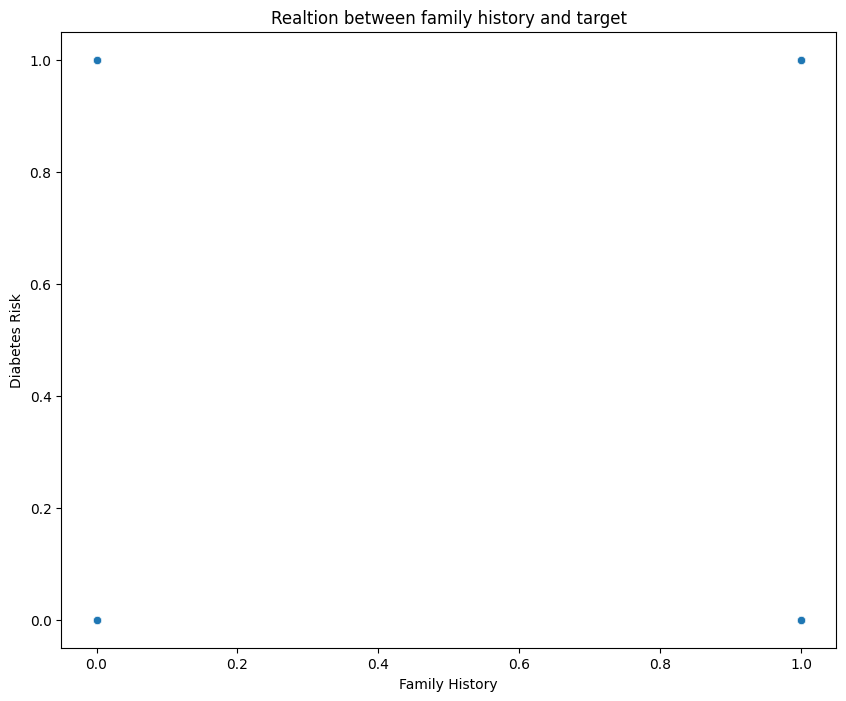

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Family History'], y=data['Diabetes Risk'])
plt.title("Realtion between family history and target")

<Axes: xlabel='Physical Activity (hours/week)', ylabel='Diabetes Risk'>

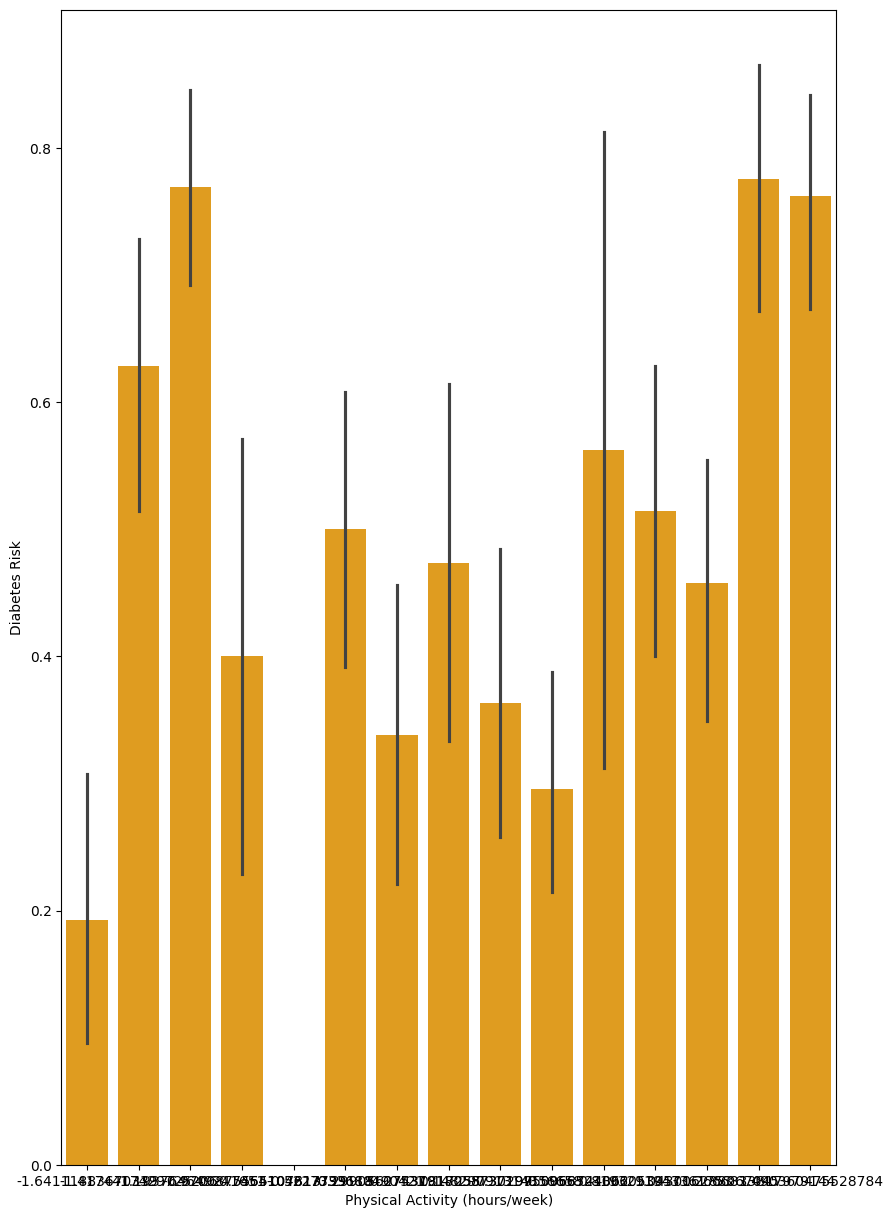

In [74]:
plt.figure(figsize=(10, 15))
sns.barplot(x=data['Physical Activity (hours/week)'], y = data['Diabetes Risk'], color="orange")

In [61]:
x = data.drop('Diabetes Risk', axis=1)
y = data['Diabetes Risk']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
lo  = LogisticRegression()
lo.fit(x_train, y_train)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred_lo = lo.predict(x_test)
y_pred_dt = dt.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy = ", accuracy_score(y_test, y_pred_lo))


accuracy =  0.535


In [76]:
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lo))

Confusion matrix: [[54 42]
 [51 53]]


In [77]:
print("classfication report:", classification_report(y_test, y_pred_lo))

classfication report:               precision    recall  f1-score   support

           0       0.51      0.56      0.54        96
           1       0.56      0.51      0.53       104

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



In [78]:
print("accuracy = ", accuracy_score(y_test, y_pred_dt))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dt))
print("classfication report:", classification_report(y_test, y_pred_dt))

accuracy =  1.0
Confusion matrix: [[ 96   0]
 [  0 104]]
classfication report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [79]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid_param = {'max_iter': [30, 40, 50]}
grid_search_model = GridSearchCV(lo,grid_param, cv=5)
grid_search_model.fit(x_train, y_train)
print(grid_search_model.best_params_)
grid_search_model.best_score_


{'max_iter': 30}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.5525)

In [80]:
random_param = {'max_depth': [5,10, 20, 30, 40, 50]}
random_search_model = RandomizedSearchCV(dt,random_param, cv=5)
random_search_model.fit(x_train, y_train)
print(random_search_model.best_params_)
random_search_model.best_score_

{'max_depth': 20}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


np.float64(1.0)

In [81]:
!pip install gradio

In [82]:
import gradio as gr
def predict(SS,FH,DR,PA,A,B,BP):
  try:
    input_data = pd.DataFrame(
        {
            "Diabetes Risk": [DR],
            "Physical Activity (hours/week)": [PA],
            "Family History": [FH],
            "Smoking Status": [SS],
            "Age": [A],
            "BMI": [B],
            "Blood Pressure": [BP],
        })
    for col in encode_cols:
      input_data[col] = le[col].transform(input_data[col])

    input_data[scale_cols] = scaler.transform(input_data[scale_cols])

    prediction = dt.predict(input_data)
    if prediction[0] == 1:
      return "yes"
    else:
      return "No "
  except Exception as e:
    return str(e)

gr.Interface(predict,
             [
              gr.Number(label="Smoking Status"),
              gr.Number(label="Family History"),
              gr.Number(label="Diabetes Risk"),
              gr.Number(label="Physical Activity (hours/week)"),
              gr.Number(label="Age"),
              gr.Number(label="BMI"),
              gr.Number(label="Blood Pressure"),
              ],
             gr.Textbox(label="Prediction")).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e5f6363a28bec6c71c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [83]:
data.columns

Index(['Age', 'BMI', 'Blood Pressure', 'Physical Activity (hours/week)',
       'Family History', 'Smoking Status', 'Diabetes Risk'],
      dtype='object')